In [1]:
from forse.networks.dcgan import *
import matplotlib.pyplot as plt
from forse.tools import *

Using TensorFlow backend.


In [2]:
dcgan = DCGAN(output_directory='/global/homes/k/krach/scratch/NNforFG/DCGAN/opt', img_size=(64, 64))

In [3]:
dcgan = DCGAN(output_directory='/global/homes/k/krach/scratch/NNforFG/DCGAN/test', img_size=(64, 64))
training_path = '/global/homes/k/krach/scratch/NNforFG/training_set/'
training_file = 'training_set_1000patches_20x20deg_T_HR1deg_LR5deg_Npix64_lat20.npy'
patch_file = training_path+training_file
dcgan.train(epochs=1001, patches_file=patch_file, batch_size=32, save_interval=1000, swap=10)

Training Data Shape:  (800, 64, 64, 1)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1092353   
Total params: 2,184,322
Trainable params: 1,091,969
Non-trainable params: 1,092,353
_________________________________________________________________


/global/homes/k/krach/usr/python_prefix_3.7/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/global/homes/k/krach/usr/python_prefix_3.7/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/global/homes/k/krach/usr/python_prefix_3.7/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0
200/200 [==============================] - 0s 199us/step
[0.6678646349906922, 1.0] [0.6907638907432556, 0.5550000071525574]


FailedPreconditionError: 2 root error(s) found.
  (0) Failed precondition:  Error while reading resource variable _AnonymousVar57 from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/_AnonymousVar57/N10tensorflow3VarE does not exist.
	 [[node mul_11/ReadVariableOp (defined at /usr/common/software/tensorflow/gpu-tensorflow/2.0.0-py37/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
  (1) Cancelled:  
0 successful operations.
0 derived errors ignored. [Op:__inference_keras_scratch_graph_8899]

Function call stack:
keras_scratch_graph -> keras_scratch_graph


In [6]:
def smooth_accuracy(y_true, y_pred):
        return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

In [175]:
dir_models = '/global/homes/k/krach/scratch/NNforFG/DCGAN/opt/disc/lat20/models/'
dcgan.discriminator = load_model(dir_models+'discrim_15000.h5', custom_objects={'smooth_accuracy': smooth_accuracy})
dcgan.generator = load_model(dir_models+'generat_15000.h5', custom_objects={'smooth_accuracy': smooth_accuracy})

In [172]:
dir_models = '/global/homes/k/krach/scratch/NNforFG/DCGAN/tests/ratio/models/pswap_10/'
dcgan.discriminator = load_model(dir_models+'discrim_15000.h5')
dcgan.generator = load_model(dir_models+'generat_15000.h5')

In [176]:
training_path = '/global/homes/k/krach/scratch/NNforFG/training_set/'
training_file = 'training_set_1000patches_20x20deg_T_HR1deg_LR5deg_Npix64_lat20.npy'
X_train, X_test, Y_train, Y_test = load_training_set(training_path+training_file, seed=1235)
gen_imgs_test = dcgan.generator.predict(X_test)
#gen_imgs_train = dcgan.generator.predict(X_train)

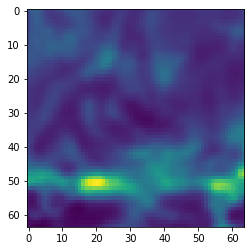

In [180]:
plt.imshow(gen_imgs_test[90, :, :, 0])

In [153]:
print(dcgan.discriminator.evaluate(gen_imgs_test, np.zeros(len(gen_imgs_test))))
print(dcgan.discriminator.evaluate(Y_test, np.ones(len(gen_imgs_test))))
print(dcgan.discriminator.predict(Y_test[0:10]))
print(dcgan.discriminator.predict(gen_imgs_test[0:10]))

200/200 [==============================] - 4s 19ms/step
[0.010029803104698658, 1.0]
200/200 [==============================] - 3s 15ms/step
[4.717326984405518, 0.0]
[[0.00584897]
 [0.00911245]
 [0.01062399]
 [0.00868791]
 [0.00714228]
 [0.01054296]
 [0.01301727]
 [0.00835559]
 [0.00901087]
 [0.00709584]]
[[0.00890601]
 [0.00907445]
 [0.01084486]
 [0.01027286]
 [0.00872305]
 [0.01393637]
 [0.01160923]
 [0.01219186]
 [0.00869802]
 [0.01199184]]


In [154]:
val = dcgan.discriminator.evaluate(Y_test, np.ones(len(gen_imgs_test)))

200/200 [==============================] - 3s 15ms/step


In [155]:
print(val)

[4.717326984405518, 0.0]


In [156]:
val = dcgan.discriminator.evaluate(gen_imgs_test, np.zeros(len(gen_imgs_test)))
print(val)

200/200 [==============================] - 3s 15ms/step
[0.010029803104698658, 1.0]


In [157]:
batch_size = 32
half_batch = batch_size // 2
ind_batch = np.random.randint(0, X_train.shape[0], batch_size)
idx = np.random.randint(0, X_train.shape[0], half_batch)
imgs = Y_train[idx]
idx = np.random.randint(0, X_train.shape[0], half_batch)
gen_imgs = dcgan.generator.predict(X_train[idx])
target_real = np.ones((half_batch, 1))
target_fake = np.zeros((half_batch, 1))
dcgan.discriminator.trainable=False
d_loss_real = dcgan.discriminator.test_on_batch(imgs, target_real)
d_loss_fake = dcgan.discriminator.test_on_batch(gen_imgs, target_fake)

In [158]:
val = dcgan.discriminator.evaluate(gen_imgs_test, np.zeros(len(gen_imgs_test)))
print(val)

200/200 [==============================] - 3s 15ms/step
[0.010029803104698658, 1.0]


In [159]:
d_loss_real = dcgan.discriminator.train_on_batch(imgs, target_real)
print(d_loss_real, dcgan.discriminator.evaluate(imgs, target_real))
d_loss_fake = dcgan.discriminator.train_on_batch(gen_imgs, target_fake)
print(d_loss_fake, dcgan.discriminator.evaluate(gen_imgs, target_fake))
d_loss_real = dcgan.discriminator.test_on_batch(imgs, target_real)
d_loss_fake = dcgan.discriminator.test_on_batch(gen_imgs, target_fake)

16/16 [==============================] - 0s 17ms/step
[0.8226118, 0.5625] [0.46680665016174316, 0.75]
16/16 [==============================] - 0s 14ms/step
[0.42166102, 0.9375] [0.4512676000595093, 0.875]


In [160]:
val = dcgan.discriminator.evaluate(Y_test, np.ones(len(gen_imgs_test)))
print(val)

200/200 [==============================] - 3s 15ms/step
[0.6463838839530944, 0.615]


In [161]:
val = dcgan.discriminator.evaluate(gen_imgs_test, np.zeros(len(gen_imgs_test)))
print(val)

200/200 [==============================] - 3s 16ms/step
[0.5211183726787567, 0.79]


In [162]:
print(dcgan.discriminator.predict(Y_test[10:20]))
print(dcgan.discriminator.predict(gen_imgs_test[20:30]))

[[0.24390832]
 [0.3431561 ]
 [0.33039367]
 [0.7405279 ]
 [0.46855646]
 [0.7933067 ]
 [0.856439  ]
 [0.42726353]
 [0.7125588 ]
 [0.50022966]]
[[0.4774853 ]
 [0.22387034]
 [0.38446957]
 [0.5015468 ]
 [0.40528676]
 [0.54328156]
 [0.35850805]
 [0.08463383]
 [0.7254129 ]
 [0.49743804]]


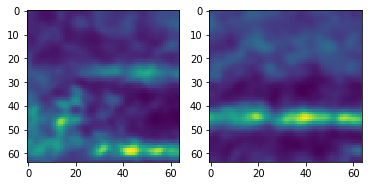

In [168]:
N = 170
plt.subplot(121)
plt.imshow(gen_imgs_test[N, :, :, 0])
plt.subplot(122)
plt.imshow(Y_test[N, :, :, 0])

NameError: name 'np' is not defined